Author: Q.R Liu

#An example of how to propagate flux generated at the annihilation/decay spot. 

Make sure you can run nuSQUIDs

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os,time
import numpy as np
import matplotlib.pyplot as plt 
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

First we construct the object

In [3]:
#info of DM
channel = 'WW'
mass    = 1000.
process = 'ann' #annihilation default

#info of neutrino spectrum binning. 
Emin         = 1.
Emax         = mass
nodes        = 100
bins         = 300

#info of oscillation parameters
theta_12=33.82
theta_13=8.6
theta_23=48.6
delta_m_12=7.39e-5
delta_m_13=2.528e-3
delta = 221.


#linear binning 
logscale = False #default
#include interactions
interactions = True #default

#construct the flux object.
Flux = propa.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

First we can plot the $\nu_\mu$ flux at production. (flavors: nu_e, nu_e_bar, nu_mu, nu_mu_bar, nu_tau, nu_tau_bar) 

Initial Flux Loading: /home/qliu/.local/lib/python2.7/site-packages/charon-0.1.0-py2.7.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/qliu/.local/lib/python2.7/site-packages/charon-0.1.0-py2.7.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/qliu/.local/lib/python2.7/site-packages/charon-0.1.0-py2.7.egg/charon/data/SpectraEW.hdf5


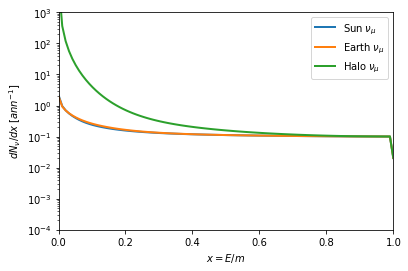

In [4]:
flux_ini_sun   = Flux.iniFlux('Sun')
flux_ini_earth = Flux.iniFlux('Earth')
flux_ini_Halo  = Flux.iniFlux('Halo')


x = Flux.iniE()/mass
plt.plot(x,flux_ini_sun['nu_mu'],linewidth=2.0,label=r'${\rm{Sun}}\;\nu_\mu$')
plt.plot(x,flux_ini_earth['nu_mu'],linewidth=2.0,label=r'${\rm{Earth}}\;\nu_\mu$')
plt.plot(x,flux_ini_Halo['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')

plt.ylim(1e-4,1e3)
plt.xlim(0.0,1.0)
plt.yscale('log')
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

Propagate the flux.

The output of propagated flux is a numpy array with columns ['Energy'], ['nu_e'], ['nu_e_bar'], ['nu_mu'], ['nu_mu_bar'], ['nu_tau'], ['nu_tau_bar'], ['zenith'].

The default is that when DM mass is smaller than 500 GeV the initial flux is without EW correction and when DM mass is larger than 500 GeV the initial flux has EW correction included.

Detector depth is not included!

In [5]:
t0 = time.time()
flux_det_sun = Flux.Sun('detector',zenith=np.pi/6.,avg=True) 
#zenith can be replaced by latitude of detector in degree and mjd, e.g. lat_det = -90, mjd = 59062.
print 'from Sun center to Earth surface, time duration:'
print time.time()-t0, 's'

t0 = time.time()
flux_det_Earth = Flux.Earth('detector',avg=True)
print 'from Earth center to Earth surface, time duration:'
print time.time()-t0, 's'

t0 = time.time()
flux_det_Halo = Flux.Halo('detector',zenith=np.pi)
print 'averaged propagation, time duration:'
print time.time()-t0, 's'

Initial Flux Loading: /home/qliu/.local/lib/python2.7/site-packages/charon-0.1.0-py2.7.egg/charon/data/SpectraEW.hdf5
from Sun center to Earth surface, time duration:
235.161126137 s
Initial Flux Loading: /home/qliu/.local/lib/python2.7/site-packages/charon-0.1.0-py2.7.egg/charon/data/SpectraEW.hdf5
from Earth center to Earth surface, time duration:
21.5649309158 s
Initial Flux Loading: /home/qliu/.local/lib/python2.7/site-packages/charon-0.1.0-py2.7.egg/charon/data/SpectraEW.hdf5
averaged propagation, time duration:
26.4292809963 s


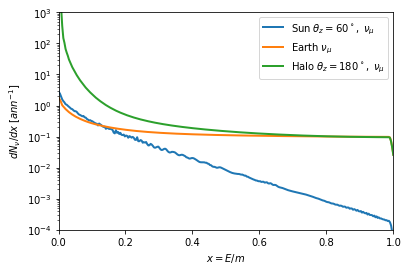

In [6]:
x = flux_det_sun['Energy']/mass
plt.plot(x,flux_det_sun['nu_mu'],linewidth=2.0,label=r'${\rm{Sun}}\;\theta_z=60^\circ,\;\nu_\mu$')
plt.plot(x,flux_det_Earth['nu_mu'],linewidth=2.0,label=r'${\rm{Earth}}\;\nu_\mu$')
plt.plot(x,flux_det_Halo['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\theta_z=180^\circ,\;\nu_\mu$')

plt.ylim(1e-4,1e3)
plt.yscale('log')
plt.xlim(0.0,1.0)
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

Then we show propagating external flux at 1000 GeV through bb channel to SunSurface and 1AU. The external flux should be in dat file with 7 columns corresponding to $E_\nu,\; \nu_e,\;\bar{\nu}_e,\;\nu_\mu,\;\bar{\nu}_\mu,\;\nu_\tau,\;\bar{\nu}_\tau$. The unit of the propagated flux is the same as the input flux. 

If the external flux is generated using charon, the path can be simply directed to the folder in ../production/, for example ../production/Sun/ for solar flux.  

Initial Flux Loading: ./bb_1000_Sun_ann.dat
Initial Flux Loading: ./bb_1000_Sun_ann.dat
Initial Flux Loading: ./bb_1000_Sun_ann.dat


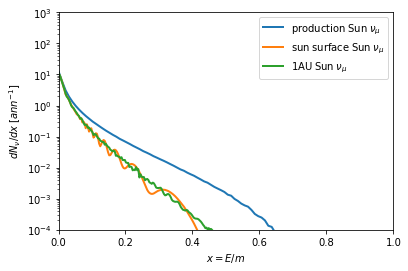

In [7]:
#path to the external flux file
path = './bb_1000_Sun_ann.dat'
Flux_external = propa.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathFlux=path)

flux_ini_sun_external   = Flux_external.iniFlux('Sun')
flux_sfc_sun_external   = Flux_external.Sun('SunSurface',avg=True)
flux_AU_sun_external    = Flux_external.Sun('1AU',avg=True)

x = Flux_external.iniE()/mass
plt.plot(x,flux_ini_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{production\;Sun}}\;\nu_\mu$')
plt.plot(flux_sfc_sun_external['Energy']/mass,flux_sfc_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{sun\;surface\;Sun}}\;\nu_\mu$')
plt.plot(flux_AU_sun_external['Energy']/mass,flux_AU_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{1AU\;Sun}}\;\nu_\mu$')



plt.ylim(1e-4,1e3)
plt.xlim(0.0,1.0)
plt.yscale('log')
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

We can also read external cross section files by setting

$NuFlux(xsec = path\_to\_xsec\_files)$ when constructing the flux object. 

xsec files should include energy differential cross sections in $n\_dsde\_CC.dat$, $n\_dsde\_NC.dat$, $p\_dsde\_CC.dat$, $p\_dsde\_NC.dat$ 

and total cross sections in $n\_sigma\_CC.dat$, $n\_sigma\_NC.dat$, $p\_sigma\_CC.dat$, $p\_sigma\_NC.dat$.

Other Sun/Earth models are also applicable by setting

$NuFlux(pathSunModel = path\_to\_sun\_model\_file,pathEarthModel = path\_to\_earth\_model\_file)$ when constructing the flux object. 

The model file should have the same format as the Sun/Earth model file in $../charon/models/$.

================================================================================

End. ヾ(๑╹ꇴ◠๑)ﾉ" 